# Homework 4 - Solutions

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Part 1: Classification of handwritten digits

In [19]:
'Obtain the MNist dataset'
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
X,y=mnist['data'],mnist['target']
X.shape

(70000, 784)

There are 70,000 images, and each image has 784 features. This is because each image is $28\times 28$ pixels, and each feature simply represents one pixel's intensity, from 0 (white) to 255 (black).

Let's take a peek at one digit from the dataset. All we need to do is grab an instance's feature vector, reshape it to a $28\times 28$ array, and display it using imshow()

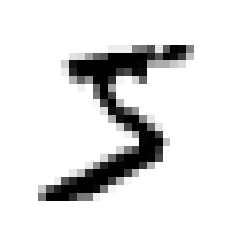

In [3]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = 'binary')
plt.axis('off')
plt.show()

This looks like a 5, and indeed that's what the label tells us

In [38]:
y[0]

'5'

Note that the label is a string. Let's cast $y$ to an integer

In [20]:
y = y.astype(np.uint8)
y = y[:,None] #keep y as a column vector

The following figure shows a few more images from the MNIST dataset

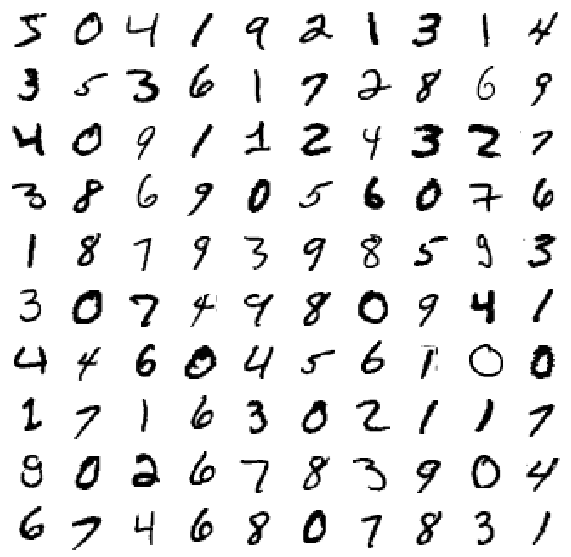

In [40]:
plt.figure(figsize=(10,10))
for i in range(100):
    digit = X[i]
    digit_image = digit.reshape(28,28)
    plt.subplot(10,10,i+1)
    plt.imshow(digit_image,cmap = 'binary')
    plt.axis('off')

The MNIST dataset is already split into a training set (the first 60000 images) and a test set (the last 10000 images)

In [21]:
X = X/255

In [42]:
np.max(X)

1.0

In [22]:
X_train,y_train = X[:60000],y[:60000]
X_test,y_test = X[60000:], y[60000:]

## Assignments

The goal is to train a linear model to classify digits as either five or not-five.

**Part 1:** Build (0,1) vectors y_5_train and y_5_test, where their $i$th entries are given by

$$
\left\{ \begin{array}{ll} 1 & \mbox{ if digit $i$ is a five}\\
0 & \mbox{ if digit $i$ is not a five}. \end{array}\right.
$$

In [23]:
y_5_train = np.zeros((len(y_train),1))
y_5_train[y_train==5]=1

In [24]:
def linregression_SGD(X,y,n_epochs,s):
    m,n = X.shape
    theta = np.random.randn(n,1) #random initialization
    MSE = np.zeros(n_epochs)
    for epoch in range(n_epochs):
        if epoch in [20*i for i in range(10)]: #print epoch every 20 iterations
            print(epoch)
        for i in range(m):
            random_row = np.random.randint(m)
            xi = X[None,random_row] #keep xi as a row vector
            yi = y[random_row]
            gradient = 2*xi.T@(xi@theta-yi)
            theta = theta - s*gradient
        MSE[epoch] = np.linalg.norm(X@theta-y)/len(y)
    return theta, MSE

In [26]:
s = 1e-3
n_iterations = 200
theta,MSE = linregression_SGD(X_train,y_5_train,n_iterations,s)

0
20
40
60
80


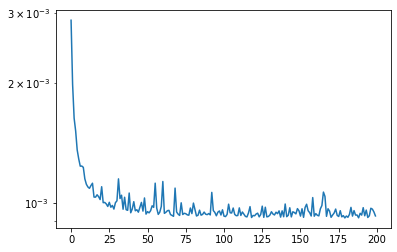

In [27]:
plt.semilogy(MSE)


**Part 2:** Use the training set to train a linear model that predicts the vector y_5_train. Use Stochastic Gradient Descent to train the model.  Use appropriate regularization as needed.

In [28]:
y_5_test = np.zeros((len(y_test),1))
y_5_test[y_test==5]=1

In [29]:
y_5_test_predicted = X_test@theta

**Part 3:**  Use your linear model to classify all the digits in the test set.  Use the rule:

$$
\mbox{classify digit $i$ as a }\left\{ \begin{array}{ll} 
5 & \mbox{ if predicted y_5_test}[i]>0.5 \\
\mbox{not a }5 & \mbox{ if predicted y_5_test}[i]\leq 0.5
\end{array}\right.
$$

How many digits are misclassified? 

In [30]:
y_5_test_predicted[y_5_test_predicted>=0.5] = 1
y_5_test_predicted[y_5_test_predicted<0.5] = 0

In [35]:
'confusion matrix'
C = np.zeros((2,2))
for i in range(2):
    for j in range(2):
        C[i,j] = sum(y_5_test_predicted[y_5_test==i]==j)
C

array([[9038.,   70.],
       [ 498.,  394.]])

In [39]:
'percentage of correct classifications'
100*sum(y_5_test_predicted == y_5_test)/len(y_5_test)

array([94.32])

# Part 2: an example from Biology

The following dataset contains cancer gene-expression levels (16,063 genes, 144 samples) from *Multiclass cancer diagnosis using tumor gene expression signatures (Golub et all, 2001)*

In [3]:
url1 = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/14cancer.xtrain'
url2 = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/14cancer.xtest'

data_train = pd.read_csv(url1,sep = '\s+',header = None)
data_train = data_train.T

data_test = pd.read_csv(url2,sep = '\s+',header = None)
data_test = data_test.T

data_train.head(5) #show first 10 rows of data_train

,0,1,2,3,4,5,6,7,8,9,...,16053,16054,16055,16056,16057,16058,16059,16060,16061,16062
0,-73.0,-69.0,-48.0,13.0,-86.0,-147.0,-65.0,-71.0,-32.0,100.0,...,-134.0,352.0,-67.0,121.0,-5.0,-11.0,-21.0,-41.0,-967.0,-120.0
1,-16.0,-63.0,-97.0,-42.0,-91.0,-164.0,-53.0,-77.0,-17.0,122.0,...,-51.0,244.0,-15.0,119.0,-32.0,4.0,-14.0,-28.0,-205.0,-31.0
2,4.0,-45.0,-112.0,-25.0,-85.0,-127.0,56.0,-110.0,81.0,41.0,...,14.0,163.0,-14.0,7.0,15.0,-8.0,-104.0,-36.0,-245.0,34.0
3,-31.0,-110.0,-20.0,-50.0,-115.0,-113.0,-17.0,-40.0,-17.0,80.0,...,26.0,625.0,18.0,59.0,-10.0,32.0,-2.0,10.0,-495.0,-37.0
4,-33.0,-39.0,-45.0,14.0,-56.0,-106.0,73.0,-34.0,18.0,64.0,...,-69.0,398.0,38.0,215.0,-2.0,44.0,3.0,68.0,-293.0,-34.0


Cancer classes are labelled as follows:

1.  breast
2.  prostate
3.  lung
4.  collerectal
5.  lymphoma
6.  bladder
7.  melanoma
8.  uterus
9.  **leukemia**
10. renal
11. pancreas
12. ovary
13. meso
14. cns


In [4]:
len(data_train)

144

In [5]:
url1 = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/14cancerlabels.ytrain'
url2 = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/14cancer.ytest'

labels_train = pd.read_csv(url1,sep='\s+',header = None)
labels_train = labels_train.T

labels_test = pd.read_csv(url2,sep='\s+',header = None)
labels_test = labels_test.T

labels_train.head(5)

,0
0,1
1,1
2,1
3,1
4,1


## Assignments

The goal is to train a linear model to classify cancers as either leukemia or not-leukemia

**Part 1:** Build (0,1) vectors y_leuk_train and y_leuk_test, where their $i$th entries are given by

$$
\left\{ \begin{array}{ll} 1 & \mbox{ if cancer $i$ is leukemia}\\
0 & \mbox{ if cancer $i$ is not leukemia}. \end{array}\right.
$$

In [6]:
X_train = data_train.to_numpy()
y_train = labels_train.to_numpy()
y_train.shape

(144, 1)

In [7]:
y_leuk_train = np.zeros((len(y_train),1))
y_leuk_train[y_train==9]=1

**Part 2:** Use the training set to train a linear model that predicts the vector y_leuk_train. Add 1-norm regularization to your model. How many model coefficients are approximately equal to 0?

In [8]:
'shrinkage function'
def shrinkage(x,k):
    #return np.maximum(0,x-k)-np.maximum(0,-x-k)
    return x*np.maximum(0,1-k/np.abs(x))

In [9]:
import scipy.linalg   # SciPy Linear Algebra Library

def Lasso_regression_ADMM(X,y,s,n_iterations,la):
    m,n = X.shape
    
    theta = np.zeros((n,1)) #or a random vector
    z = np.zeros((n,1))
    u = np.zeros((n,1))
    
    theta = np.random.rand(n,1)
    z = np.random.rand(n,1)
    u = np.random.rand(n,1)
    
    'lu decomposition'
    P,L,U = scipy.linalg.lu(X.T@X+s*np.identity(n))
    
    MSE = np.zeros(n_iterations)
    for i in range(n_iterations):
        #theta-update:
        q = X.T@y+s*(z-u) 
        q = P.T@q
        q = scipy.linalg.solve_triangular(L,q,lower=True)
        theta = scipy.linalg.solve_triangular(U,q)
        #theta = np.linalg.solve(X.T@X+s*np.identity(n),q)     
        
        #z-update
        z = shrinkage(theta+u,la/s)
        #u-update
        u = u+theta-z
        MSE[i] = np.linalg.norm(X@theta-y)/m
    return MSE, theta

In [10]:
s = 1
la = 10 # if you use a smaller value, say, lambda = 1, the model will overfit the training set and will perform poorly on the test set
n_iterations = 10
MSE, theta = Lasso_regression_ADMM(X_train,y_leuk_train,s,n_iterations,la)

0
1
2
3
4
5
6
7
8
9


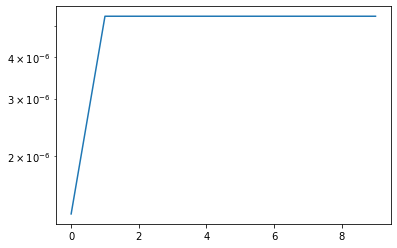

In [11]:
plt.semilogy(MSE) #it looks like one iteration is enough! 

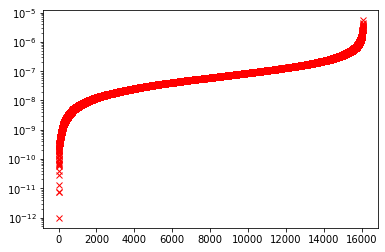

In [10]:
'plot absolute value of the coefficients'
plt.semilogy(np.sort(np.abs(theta),axis=0),'rx')

**Part 3:**  Use your linear model to classify all the cancers in the test set.  Use the rule:

$$
\mbox{classify cancer $i$ as a }\left\{ \begin{array}{ll} 
\mbox{leukemia} & \mbox{ if predicted y_leuk_test}[i]>0.5 \\
\mbox{not leukemia }5 & \mbox{ if predicted y_leuk_test}[i]\leq 0.5
\end{array}\right.
$$

How many cancers are misclassified? 

In [12]:
X_test = data_test.to_numpy()
y_test = labels_test.to_numpy()
y_test.shape

(54, 1)

In [13]:
y_leuk_test = np.zeros((len(y_test),1))
y_leuk_test[y_test==9]=1

In [14]:
y_leuk_predicted = X_test@theta

In [15]:
y_leuk_predicted[y_leuk_predicted>=0.5]=1
y_leuk_predicted[y_leuk_predicted<0.5] = 0

In [17]:
'confusion matrix'
C = np.zeros((2,2))
for i in range(2):
    for j in range(2):
        C[i,j] = sum(y_leuk_predicted[y_leuk_test==i]==j)

In [18]:
C #only one misclassified cancer!

array([[48.,  0.],
       [ 1.,  5.]])